In [55]:
#importing torch
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [72]:
#Creating model from nn.module
class model (nn.Module):
    # input = age,job,marital,education,defult,balance,housing,
    #           loan,contact,campaign,pdays,previous,poutcome
    # =14 nodes
    # H1=10
    # H2=8
    # out = 1 (0= no, 1 = yes)
    def __init__(self,in_features=14,h1=10,h2=8,out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x= self.out(x)
        return x

In [74]:
#importing data
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = "https://raw.githubusercontent.com/CodingForTheBlind/EExAiHack2023/main/Pre-Practice-Task/2023%20Pre%20Practice%20(Task)/Task/train.csv"
df = pd.read_csv(url)

In [75]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,54,entrepreneur,married,unknown,no,1956,no,no,cellular,nov,221,5,-1,0,unknown,no
3995,3996,37,blue-collar,divorced,secondary,no,0,yes,no,cellular,apr,146,4,-1,0,unknown,yes
3996,3997,34,management,married,secondary,no,-294,yes,no,unknown,may,532,2,-1,0,unknown,no
3997,3998,43,technician,married,secondary,no,275,no,no,cellular,aug,69,6,-1,0,unknown,no


In [76]:
#changing text data (ie. job,marital,education) into numbers
job_list = ['unknown','unemployed','blue-collar','retired','student','housemaid','admin.','services','technician','self-employed','management','entrepreneur']
for idx,ele in enumerate(job_list):
    df["job"] = df["job"].replace(ele,idx)
df["marital"] = df["marital"].replace("unkown",0)
df["marital"] = df["marital"].replace("single",1)
df["marital"] = df["marital"].replace("divorced",2)
df["marital"] = df["marital"].replace("married",3)
education_list = ['unknown','illiterate','primary','secondary','tertiary','high.school','professional.course','university.degree']
for idx,ele in enumerate(education_list):
    df["education"] = df["education"].replace(ele,idx)
df["default"] = df["default"].replace("no",0)
df["default"] = df["default"].replace("yes",1)
df["loan"] = df["loan"].replace("no",0)
df["loan"] = df["loan"].replace("yes",1)
df["housing"] = df["housing"].replace("no",0)
df["housing"] = df["housing"].replace("yes",1)
df["contact"] = df["contact"].replace("unknown",0)
df["contact"] = df["contact"].replace("cellular",1)
df["contact"] = df["contact"].replace("telephone",2)
month_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
for idx,ele in enumerate(month_list,1):
    df["month"] = df["month"].replace(ele,idx)
df["poutcome"] = df["poutcome"].replace('failure',1)
df["poutcome"] = df["poutcome"].replace('unknown',0)
df["poutcome"] = df["poutcome"].replace("other",2)
df["poutcome"] = df["poutcome"].replace("success",3)
df["y"] = df["y"].replace("no",0)
df["y"] = df["y"].replace("yes",1)

In [78]:
df

,id,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,1,30,1,3,2,0,1787,0,0,1,10,79,1,-1,0,0,0
1,2,33,7,3,3,0,4789,1,1,1,5,220,1,339,4,1,0
2,3,35,10,1,4,0,1350,1,0,1,4,185,1,330,1,1,0
3,4,30,10,3,4,0,1476,1,1,0,6,199,4,-1,0,0,0
4,5,59,2,3,3,0,0,1,0,0,5,226,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,54,11,3,0,0,1956,0,0,1,11,221,5,-1,0,0,0
3995,3996,37,2,2,3,0,0,1,0,1,4,146,4,-1,0,0,1
3996,3997,34,10,3,3,0,-294,1,0,0,5,532,2,-1,0,0,0
3997,3998,43,8,3,3,0,275,0,0,1,8,69,6,-1,0,0,0


In [94]:
X = df.drop('y',axis=1)
X = X.drop('duration',axis=1)
X = X.drop('id',axis=1)
y = df["y"]
#convert to np array
print(y)
X = X.values
y = y.values
y = np.reshape(y, (-1, 1))
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2)
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    1
3996    0
3997    0
3998    0
Name: y, Length: 3999, dtype: int64


In [105]:
#selecting lost function and optimizer
Model = model()
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(Model.parameters(),lr=0.01)


In [110]:
#training
epoch=200
losses =[]
for i in range(epoch):
    y_pred = Model.forward(X_train)
    loss = loss_fun(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if(i%10==0):print(f'epoch:{i} and loss:{loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:0 and loss:0.09322875738143921
epoch:10 and loss:0.0931914895772934
epoch:20 and loss:0.09315464645624161
epoch:30 and loss:0.09311883896589279
epoch:40 and loss:0.09308446198701859
epoch:50 and loss:0.09305181354284286
epoch:60 and loss:0.09301845729351044
epoch:70 and loss:0.09298192709684372
epoch:80 and loss:0.09294624626636505
epoch:90 and loss:0.092908576130867
epoch:100 and loss:0.09287554770708084
epoch:110 and loss:0.09284565597772598
epoch:120 and loss:0.09281794726848602
epoch:130 and loss:0.09279363602399826
epoch:140 and loss:0.09277040511369705
epoch:150 and loss:0.09274809807538986
epoch:160 and loss:0.09272641688585281
epoch:170 and loss:0.09270511567592621
epoch:180 and loss:0.09268341958522797
epoch:190 and loss:0.09266263246536255


Text(0, 0.5, 'losses error')

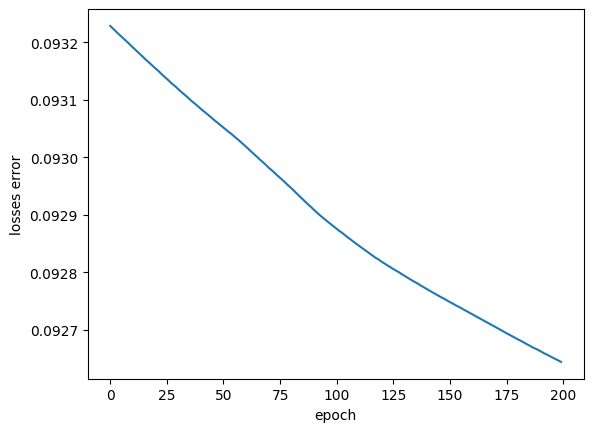

In [111]:
#graphing error rate
plt.plot(range(epoch),losses)
plt.xlabel("epoch")
plt.ylabel("losses error")

In [113]:
#test
with torch.no_grad():
    y_eval = Model.forward(X_test)
    loss = loss_fun(y_eval,y_test)
    print(loss)

tensor(0.0929)


In [115]:
cor=0
al=0
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_val = Model.forward(data)
        al+=1
        if y_val.argmax().item() == y_test[i]:
            cor+=1
print(f"we got{cor/al*100}% accuracy")

we got89.125% accuracy
